In [1]:
import numpy as np
import pandas as pd
! pip install sidetable
import sidetable
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

  Using cached https://files.pythonhosted.org/packages/a2/e7/7f1f22ad2d9a7b1003f04b68e7baa9c5646b1a918c359dc2a1f514d04fb4/sidetable-0.6.0-py3-none-any.whl


In [2]:
# load data
df = pd.read_csv('https://raw.githubusercontent.com/Carl-Lejerskar/HMEQ/master/hmeq.csv')
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [4]:
# check target balance (BAD)
df.stb.freq(['BAD'], style = True)

,BAD,count,percent,cumulative_count,cumulative_percent
0,0,"4,771",80.05%,"4,771",80.05%
1,1,"1,189",19.95%,"5,960",100.00%


In [5]:
# REASON - check categories
df.stb.freq(['REASON'], style = True)

,REASON,count,percent,cumulative_count,cumulative_percent
0,DebtCon,"3,928",68.82%,"3,928",68.82%
1,HomeImp,"1,780",31.18%,"5,708",100.00%


In [6]:
# JOB - check categories
df.stb.freq(['JOB'], style = True)

,JOB,count,percent,cumulative_count,cumulative_percent
0,Other,"2,388",42.03%,"2,388",42.03%
1,ProfExe,"1,276",22.46%,"3,664",64.50%
2,Office,948,16.69%,"4,612",81.18%
3,Mgr,767,13.50%,"5,379",94.68%
4,Self,193,3.40%,"5,572",98.08%
5,Sales,109,1.92%,"5,681",100.00%


In [7]:
# Check numeric variables
df.describe()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5442.000000,5848.000000,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
mean,0.199497,18607.969799,73760.817200,101776.048741,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,0.399656,11207.480417,44457.609458,57385.775334,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.601746
min,0.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,46276.000000,66075.500000,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.140031
50%,0.000000,16300.000000,65019.000000,89235.500000,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,0.000000,23300.000000,91488.000000,119824.250000,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.003141
max,1.000000,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


In [8]:
# missing check
df.stb.missing()

,missing,total,percent
DEBTINC,1267,5960,21.258389
DEROG,708,5960,11.879195
DELINQ,580,5960,9.731544
MORTDUE,518,5960,8.691275
YOJ,515,5960,8.640940
NINQ,510,5960,8.557047
CLAGE,308,5960,5.167785
JOB,279,5960,4.681208
REASON,252,5960,4.228188
CLNO,222,5960,3.724832


### Unvariate analysis


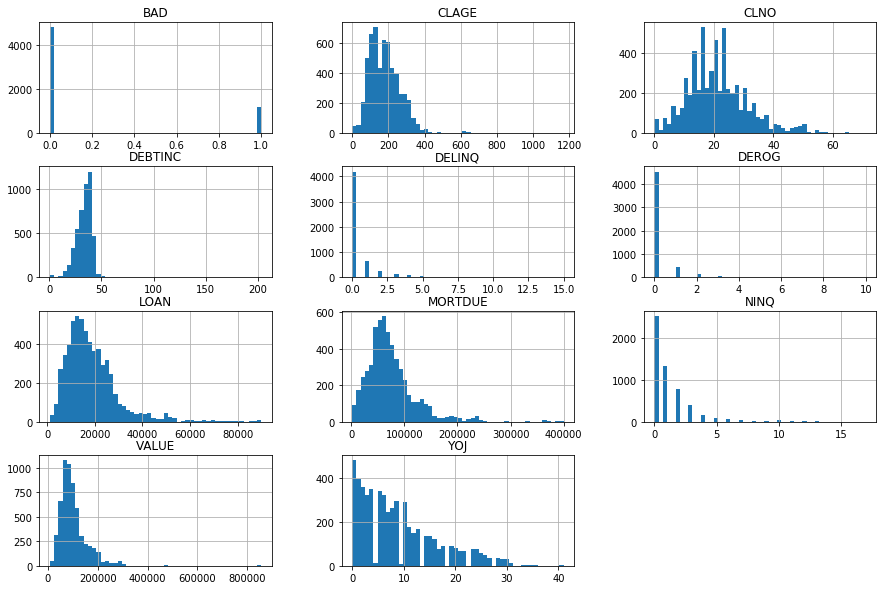

In [9]:
# distribution plots - Histograms
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.hist(figsize = (15, 10), bins = 50);

### Missing input

In [10]:
# Jobs
## Let's fill missing values with the residual category
df['JOB'] = df['JOB'].fillna(value = 'Other')

In [11]:
df.stb.freq(['JOB'], style = True)

,JOB,count,percent,cumulative_count,cumulative_percent
0,Other,"2,667",44.75%,"2,667",44.75%
1,ProfExe,"1,276",21.41%,"3,943",66.16%
2,Office,948,15.91%,"4,891",82.06%
3,Mgr,767,12.87%,"5,658",94.93%
4,Self,193,3.24%,"5,851",98.17%
5,Sales,109,1.83%,"5,960",100.00%


In [12]:
# Reason
## We fill missing values with the most frequent value ('DebtCon')
df['REASON'] = df['REASON'].fillna('DebtCon')

In [13]:
df.stb.freq(['REASON'], style = True)

,REASON,count,percent,cumulative_count,cumulative_percent
0,DebtCon,"4,180",70.13%,"4,180",70.13%
1,HomeImp,"1,780",29.87%,"5,960",100.00%


In [14]:
# numeric variables
## we input missings with their median (given the outliers detected)
df['DEBTINC'] = df['DEBTINC'].fillna(df['DEBTINC'].median())
df['DEROG'] = df['DEROG'].fillna(df['DEROG'].median())
df['DELINQ'] = df['DELINQ'].fillna(df['DELINQ'].median())
df['MORTDUE'] = df['MORTDUE'].fillna(df['MORTDUE'].median())
df['YOJ'] = df['YOJ'].fillna(df['YOJ'].median())
df['NINQ'] = df['NINQ'].fillna(df['NINQ'].median())
df['CLAGE'] = df['CLAGE'].fillna(df['CLAGE'].median())
df['CLNO'] = df['CLNO'].fillna(df['CLNO'].median())
df['VALUE'] = df['VALUE'].fillna(df['VALUE'].median())

In [15]:
# missing check
df.stb.missing()

,missing,total,percent
BAD,0,5960,0.0
LOAN,0,5960,0.0
MORTDUE,0,5960,0.0
VALUE,0,5960,0.0
REASON,0,5960,0.0
JOB,0,5960,0.0
YOJ,0,5960,0.0
DEROG,0,5960,0.0
DELINQ,0,5960,0.0
CLAGE,0,5960,0.0


## Bivariate Analysis


In [16]:
df.corr()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
BAD,1.000000,-0.075099,-0.046186,-0.036492,-0.053956,0.269921,0.346503,-0.165614,0.170031,-0.004543,0.154544
LOAN,-0.075099,1.000000,0.216380,0.331522,0.096878,0.006996,-0.028869,0.088237,0.045266,0.074317,0.068938
MORTDUE,-0.046186,0.216380,1.000000,0.788736,-0.076201,-0.047123,0.003580,0.129799,0.032582,0.318515,0.134575
VALUE,-0.036492,0.331522,0.788736,1.000000,0.013638,-0.043808,-0.008158,0.169536,-0.002539,0.265029,0.113080
YOJ,-0.053956,0.096878,-0.076201,0.013638,1.000000,-0.057729,0.051580,0.186203,-0.062837,0.032815,-0.046482
DEROG,0.269921,0.006996,-0.047123,-0.043808,-0.057729,1.000000,0.171286,-0.079482,0.146590,0.052075,0.020542
DELINQ,0.346503,-0.028869,0.003580,-0.008158,0.051580,0.171286,1.000000,0.026324,0.059194,0.161153,0.048307
CLAGE,-0.165614,0.088237,0.129799,0.169536,0.186203,-0.079482,0.026324,1.000000,-0.109736,0.233802,-0.040741
NINQ,0.170031,0.045266,0.032582,-0.002539,-0.062837,0.146590,0.059194,-0.109736,1.000000,0.085912,0.120310
CLNO,-0.004543,0.074317,0.318515,0.265029,0.032815,0.052075,0.161153,0.233802,0.085912,1.000000,0.159850


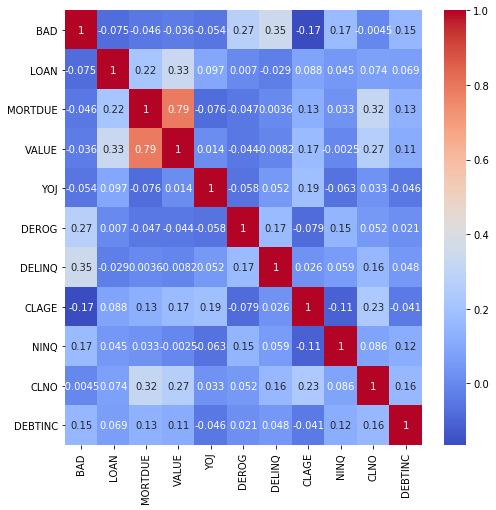

In [17]:
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.heatmap(df.corr(),
            cmap = 'coolwarm', 
            annot = True)

## WOE Transformation

### 1. With NANs

In [18]:
!pip install scorecardpy
!pip install monotonic-binning
import scorecardpy as sc
from monotonic_binning.monotonic_woe_binning import Binning

  Stored in directory: C:\Users\leand\AppData\Local\pip\Cache\wheels\1d\66\14\23aeb4e1128278f5880580e2fdd10e956de112a5d56a3a043e
Successfully built scorecardpy


In [19]:
# reload data
df = pd.read_csv('https://raw.githubusercontent.com/Carl-Lejerskar/HMEQ/master/hmeq.csv')

#### a) Train / Test split

In [20]:
# Perform a 70 / 30 split of data
train, test = sc.split_df(df, 'BAD', ratio = 0.7, seed = 999).values()

#### b) Compute monotonic WOEs - Numeric Variables

In [21]:
var = train.drop(['BAD', 'REASON', 'JOB'], axis = 1).columns
y_var = train['BAD']

def woe_num(x, y):
  bin_object = Binning(y, n_threshold = 50, y_threshold = 10, p_threshold = 0.35, sign=False)
  global breaks 
  breaks = {}
  for i in x:
    bin_object.fit(train[[y, i]])
    breaks[i] = (bin_object.bins[1:-1].tolist())
  return breaks

In [22]:
woe_num(var, 'BAD')

{'LOAN': [38600.0, 89200.0],
 'MORTDUE': [153896.0, 399412.0],
 'VALUE': [855909.0],
 'YOJ': [0.0, 41.0],
 'DEROG': [0.0, 1.0, 2.0, 10.0],
 'DELINQ': [0.0, 1.0, 2.0, 3.0, 15.0],
 'CLAGE': [1154.6333332999998],
 'NINQ': [0.0, 1.0, 2.0, 3.0, 4.0, 17.0],
 'CLNO': [26.0, 32.0, 38.0, 71.0],
 'DEBTINC': [30.774536166999997,
  34.529550086,
  40.315819301,
  42.909997351,
  45.413177555,
  203.31214869]}

#### c) Categorical variables

In [23]:
# Check categorical variables names
bins = sc.woebin(train, y = 'BAD', x = ['JOB', 'REASON'], save_breaks_list = 'cat_breaks')

[INFO] creating woe binning ...
[INFO] The breaks_list is saved as cat_breaks_20200724_164925.py


#### d) Merge numeric and categorical variables breaks

In [25]:
# import dictionary
from cat_breaks_20200724_164925 import breaks_list
breaks_list

# merge
breaks.update(breaks_list)
print(breaks)

{'LOAN': [38600.0, 89200.0], 'MORTDUE': [153896.0, 399412.0], 'VALUE': [855909.0], 'YOJ': [0.0, 41.0], 'DEROG': [0.0, 1.0, 2.0, 10.0], 'DELINQ': [0.0, 1.0, 2.0, 3.0, 15.0], 'CLAGE': [1154.6333332999998], 'NINQ': [0.0, 1.0, 2.0, 3.0, 4.0, 17.0], 'CLNO': [26.0, 32.0, 38.0, 71.0], 'DEBTINC': [30.774536166999997, 34.529550086, 40.315819301, 42.909997351, 45.413177555, 203.31214869], 'JOB': ['Office', 'ProfExe', 'Mgr%,%Other', 'Self%,%Sales'], 'REASON': ['DebtCon', 'HomeImp']}


#### e) Compute WOEs

In [26]:
bins_adj = sc.woebin(df, 'BAD', breaks_list= breaks, positive = 'bad|0') # change positive to adjust WOE to ln(GOOD / BAD)

[INFO] creating woe binning ...


{'VALUE': <Figure size 432x288 with 2 Axes>,
 'NINQ': <Figure size 432x288 with 2 Axes>,
 'DEROG': <Figure size 432x288 with 2 Axes>,
 'DEBTINC': <Figure size 432x288 with 2 Axes>,
 'CLNO': <Figure size 432x288 with 2 Axes>,
 'YOJ': <Figure size 432x288 with 2 Axes>,
 'JOB': <Figure size 432x288 with 2 Axes>,
 'MORTDUE': <Figure size 432x288 with 2 Axes>,
 'CLAGE': <Figure size 432x288 with 2 Axes>,
 'DELINQ': <Figure size 432x288 with 2 Axes>,
 'REASON': <Figure size 432x288 with 2 Axes>,
 'LOAN': <Figure size 432x288 with 2 Axes>}

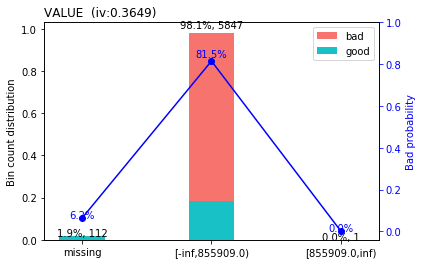

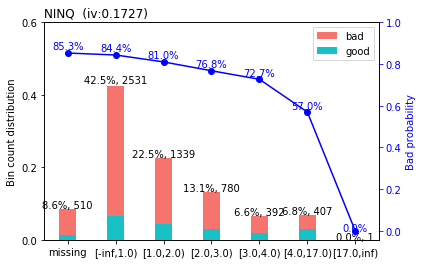

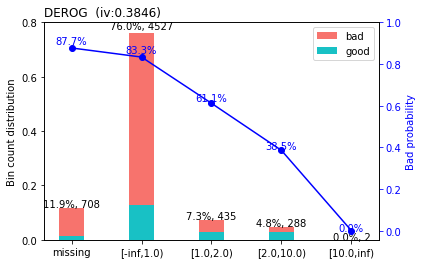

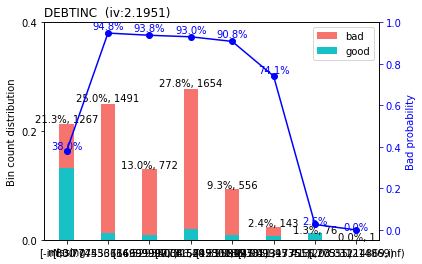

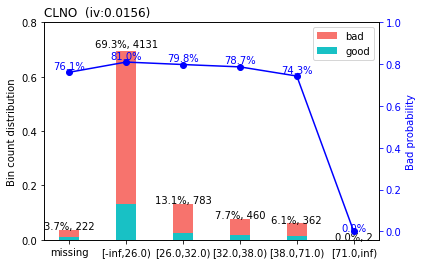

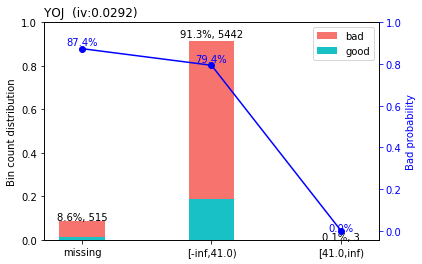

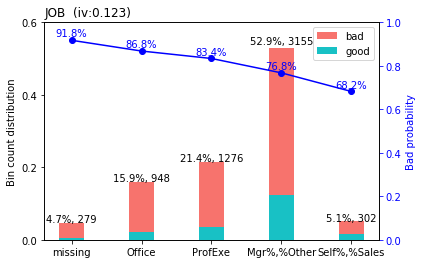

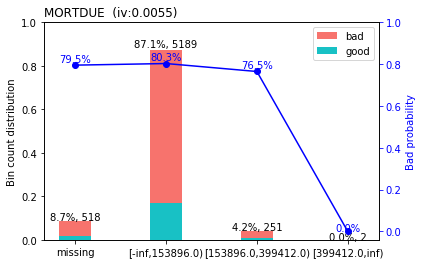

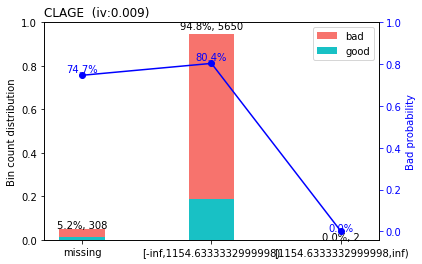

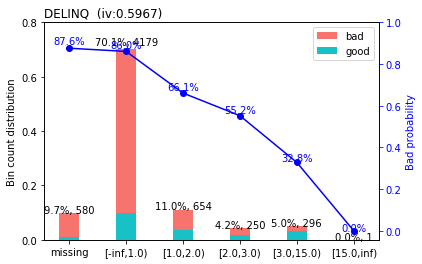

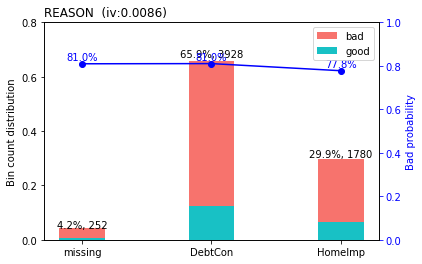

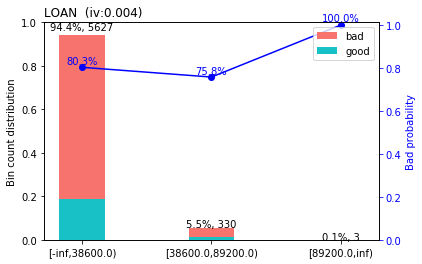

In [27]:
sc.woebin_plot(bins_adj)

#### f) Apply transformations to df

In [28]:
# converting train and test into woe values
train_woe = sc.woebin_ply(train, bins_adj)
test_woe = sc.woebin_ply(test, bins_adj)

[INFO] converting into woe values ...
[INFO] converting into woe values ...


#### g) Merge original variables with WOEs

In this case, we will merge by index because we don't have any ID. 

In [29]:
# Merge by index
train_final = train.merge(train_woe, how = 'left', left_index=True, right_index=True)
test_final = test.merge(test_woe, how = 'left', left_index=True, right_index=True)

In [30]:
train_final.head(10)

,BAD_x,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,BAD_y,VALUE_woe,NINQ_woe,DEROG_woe,DEBTINC_woe,CLNO_woe,YOJ_woe,JOB_woe,MORTDUE_woe,CLAGE_woe,DELINQ_woe,REASON_woe,LOAN_woe
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN,1,0.091721,0.062369,0.220601,-1.880721,0.060205,-0.040366,-0.194240,0.015803,0.020057,0.429758,-0.138124,0.015924
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN,1,0.091721,0.295176,0.220601,-1.880721,0.060205,-0.040366,-0.194240,0.015803,0.020057,-1.180877,-0.138124,0.015924
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,-4.097682,0.368226,0.575791,-1.880721,-0.230025,0.545228,1.020240,-0.032048,-0.308261,0.564183,0.057476,0.015924
5,1,1700,30548.0,40320.0,HomeImp,Other,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614,1,0.091721,0.062369,0.220601,1.204324,0.060205,-0.040366,-0.194240,0.015803,0.020057,0.429758,-0.138124,0.015924
7,1,1800,28502.0,43034.0,HomeImp,Other,11.0,0.0,0.0,88.766030,0.0,8.0,36.884894,1,0.091721,0.295176,0.220601,1.204324,0.060205,-0.040366,-0.194240,0.015803,0.020057,0.429758,-0.138124,0.015924
8,1,2000,32700.0,46740.0,HomeImp,Other,3.0,0.0,2.0,216.933333,1.0,12.0,NaN,1,0.091721,0.062369,0.220601,-1.880721,0.060205,-0.040366,-0.194240,0.015803,0.020057,-1.180877,-0.138124,0.015924
9,1,2000,NaN,62250.0,HomeImp,Sales,16.0,0.0,0.0,115.800000,0.0,13.0,NaN,1,0.091721,0.295176,0.220601,-1.880721,0.060205,-0.040366,-0.625915,-0.032048,0.020057,0.429758,-0.138124,0.015924
10,1,2000,22608.0,NaN,NaN,NaN,18.0,NaN,NaN,NaN,NaN,NaN,NaN,1,-4.097682,0.368226,0.575791,-1.880721,-0.230025,-0.040366,1.020240,0.015803,-0.308261,0.564183,0.057476,0.015924
13,0,2000,64536.0,87400.0,NaN,Mgr,2.5,0.0,0.0,147.133333,0.0,24.0,NaN,0,0.091721,0.295176,0.220601,-1.880721,0.060205,-0.040366,-0.194240,0.015803,0.020057,0.429758,0.057476,0.015924
14,1,2100,71000.0,83850.0,HomeImp,Other,8.0,0.0,1.0,123.000000,0.0,16.0,NaN,1,0.091721,0.295176,0.220601,-1.880721,0.060205,-0.040366,-0.194240,0.015803,0.020057,-0.723884,-0.138124,0.015924


In [31]:
train_final = train_final.drop(columns = 'BAD_y').rename(columns={'BAD_x':'vd'})
test_final = test_final.drop(columns = 'BAD_y').rename(columns={'BAD_x':'vd'})

### Missing Input

In [32]:
# Jobs
## Let's fill missing values with the residual category
train_final['JOB'] = train_final['JOB'].fillna(value = 'Other')

# Reason
## We fill missing values with the most frequent value ('DebtCon')
train_final['REASON'] = train_final['REASON'].fillna('DebtCon')

# numeric variables
## we input missings with their median (given the outliers detected)
train_final['DEBTINC'] = train_final['DEBTINC'].fillna(train_final['DEBTINC'].median())
train_final['DEROG'] = train_final['DEROG'].fillna(train_final['DEROG'].median())
train_final['DELINQ'] = train_final['DELINQ'].fillna(train_final['DELINQ'].median())
train_final['MORTDUE'] = train_final['MORTDUE'].fillna(train_final['MORTDUE'].median())
train_final['YOJ'] = train_final['YOJ'].fillna(train_final['YOJ'].median())
train_final['NINQ'] = train_final['NINQ'].fillna(train_final['NINQ'].median())
train_final['CLAGE'] = train_final['CLAGE'].fillna(train_final['CLAGE'].median())
train_final['CLNO'] = train_final['CLNO'].fillna(train_final['CLNO'].median())
train_final['VALUE'] = train_final['VALUE'].fillna(train_final['VALUE'].median())

# missing check
train_final.stb.missing()

,missing,total,percent
vd,0,4172,0.0
VALUE_woe,0,4172,0.0
REASON_woe,0,4172,0.0
DELINQ_woe,0,4172,0.0
CLAGE_woe,0,4172,0.0
MORTDUE_woe,0,4172,0.0
JOB_woe,0,4172,0.0
YOJ_woe,0,4172,0.0
CLNO_woe,0,4172,0.0
DEBTINC_woe,0,4172,0.0


In [33]:
# Jobs
## Let's fill missing values with the residual category
test_final['JOB'] = test_final['JOB'].fillna(value = 'Other')

# Reason
## We fill missing values with the most frequent value ('DebtCon')
test_final['REASON'] = test_final['REASON'].fillna('DebtCon')

# numeric variables
## we input missings with their median (given the outliers detected)
test_final['DEBTINC'] = test_final['DEBTINC'].fillna(test_final['DEBTINC'].median())
test_final['DEROG'] = test_final['DEROG'].fillna(test_final['DEROG'].median())
test_final['DELINQ'] = test_final['DELINQ'].fillna(test_final['DELINQ'].median())
test_final['MORTDUE'] = test_final['MORTDUE'].fillna(test_final['MORTDUE'].median())
test_final['YOJ'] = test_final['YOJ'].fillna(test_final['YOJ'].median())
test_final['NINQ'] = test_final['NINQ'].fillna(test_final['NINQ'].median())
test_final['CLAGE'] = test_final['CLAGE'].fillna(test_final['CLAGE'].median())
test_final['CLNO'] = test_final['CLNO'].fillna(test_final['CLNO'].median())
test_final['VALUE'] = test_final['VALUE'].fillna(test_final['VALUE'].median())

# missing check
test_final.stb.missing()

,missing,total,percent
vd,0,1788,0.0
VALUE_woe,0,1788,0.0
REASON_woe,0,1788,0.0
DELINQ_woe,0,1788,0.0
CLAGE_woe,0,1788,0.0
MORTDUE_woe,0,1788,0.0
JOB_woe,0,1788,0.0
YOJ_woe,0,1788,0.0
CLNO_woe,0,1788,0.0
DEBTINC_woe,0,1788,0.0


## Categorical variables

We can drop categorical variables that were transformed to WOEs or perform a One Hot Ecoding to them

In [34]:
# Drop transformed variables
train_final = train_final.drop(columns = ['JOB', 'REASON'])
test_final = test_final.drop(columns = ['JOB', 'REASON'])

## IV Analysis

In [48]:
# This function calculates information value (IV) for multiple x variables
sc.iv(train_final, y = 'vd')

,variable,info_value
17,DEBTINC_woe,2.187028
21,LOAN,0.823108
11,DELINQ,0.656117
6,DELINQ_woe,0.592269
3,DEROG,0.440636
12,DEROG_woe,0.434837
2,VALUE_woe,0.392219
8,YOJ,0.329940
5,CLNO,0.246640
1,NINQ,0.207704


In [50]:
# This function filter variables base on specified conditions, such as information value,
# missing rate, identical value rate.
sc.var_filter(train_final, y = 'vd')

[INFO] filtering variables ...
Variable filtering on 4172 rows and 23 columns in 00:00:13 
6 variables are removed


,VALUE,NINQ,DEROG,YOJ_woe,CLNO,DELINQ_woe,NINQ_woe,YOJ,CLAGE,DELINQ,DEROG_woe,DEBTINC,MORTDUE,DEBTINC_woe,JOB_woe,LOAN,vd
0,39025.0,1.0,0.0,-0.040366,9.0,0.429758,0.062369,10.5,94.366667,0.0,0.220601,34.654955,25860.0,-1.880721,-0.19424,1100,1
1,68400.0,0.0,0.0,-0.040366,14.0,-1.180877,0.295176,7.0,121.833333,2.0,0.220601,34.654955,70053.0,-1.880721,-0.19424,1300,1
3,89200.0,1.0,0.0,0.545228,20.0,0.564183,0.368226,7.0,173.500000,0.0,0.575791,34.654955,64978.0,-1.880721,1.02024,1500,1
5,40320.0,1.0,0.0,-0.040366,8.0,0.429758,0.062369,9.0,101.466002,0.0,0.220601,37.113614,30548.0,1.204324,-0.19424,1700,1
7,43034.0,0.0,0.0,-0.040366,8.0,0.429758,0.295176,11.0,88.766030,0.0,0.220601,36.884894,28502.0,1.204324,-0.19424,1800,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5952,94687.0,0.0,0.0,-0.040366,16.0,0.429758,0.295176,16.0,214.426206,0.0,0.220601,34.751158,50240.0,1.204324,-0.19424,88500,0
5953,94058.0,0.0,0.0,-0.040366,15.0,0.429758,0.295176,16.0,218.304978,0.0,0.220601,34.242465,53307.0,1.323958,-0.19424,88800,0
5954,93371.0,0.0,0.0,-0.040366,15.0,-0.723884,0.295176,15.0,205.650159,1.0,0.220601,34.818262,48919.0,1.204324,-0.19424,88900,0
5955,90185.0,0.0,0.0,-0.040366,16.0,0.429758,0.295176,16.0,221.808718,0.0,0.220601,36.112347,57264.0,1.204324,-0.19424,88900,0


## Logistic Regression

##### 1) X / Y split

In [35]:
y_train = train_final.loc[:,'vd']
X_train = train_final.loc[:,train_final.columns != 'vd']
y_test = test_final.loc[:,'vd']
X_test = test_final.loc[:,train_final.columns != 'vd']

#### 2) Fit model

In [43]:
# logistic regression ------
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty = 'l1', C= 0.9)
lr.fit(X_train, y_train)
print(lr.coef_)

[[-2.30571731e-05 -6.26786760e-06  3.68635074e-06 -1.51766228e-02
   1.36507030e-01  6.30783775e-01 -6.26492026e-03 -2.14996444e-02
  -4.41055850e-02  6.33782252e-03 -9.74523407e-01 -7.00554205e-01
  -5.91550615e-01 -8.96358065e-01 -3.90032347e+00 -1.28711126e+00
  -1.18721267e+00 -3.16017542e+00 -2.67174379e+00 -6.91454500e-02
  -2.35387484e-01 -3.63894758e+00]]


#### 3) Performance

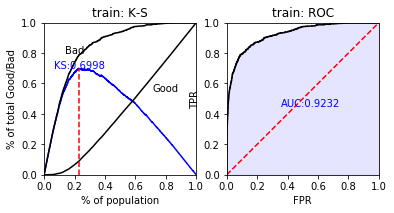

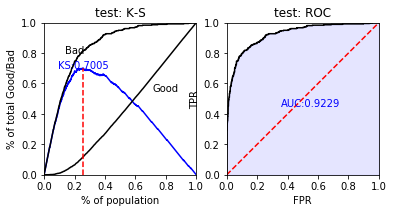

In [44]:
# predicted proability
train_pred = lr.predict_proba(X_train)[:,1]
test_pred = lr.predict_proba(X_test)[:,1]

# performance ks & roc ------
train_perf = sc.perf_eva(y_train, train_pred, title = "train")
test_perf = sc.perf_eva(y_test, test_pred, title = "test")

In [45]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, classification_report, roc_curve

predictions = lr.predict(X_test)

print('Accuracy')
print(accuracy_score(y_test, predictions))
print('AUC Score')
print(roc_auc_score(y_test, predictions))

Accuracy
0.8959731543624161
AUC Score
0.8067696680349288


In [46]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1431
           1       0.79      0.66      0.72       357

    accuracy                           0.90      1788
   macro avg       0.85      0.81      0.83      1788
weighted avg       0.89      0.90      0.89      1788



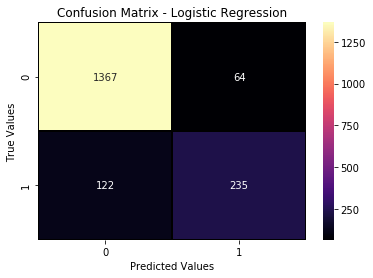

In [47]:
conf_log2 = confusion_matrix(y_test,predictions)
sns.heatmap(data=conf_log2, annot=True, linewidth=0.7, linecolor='k', fmt='.0f', cmap='magma')
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.title('Confusion Matrix - Logistic Regression');